<div style="border-radius:10px; padding: 15px; background-color: yellow; font-size:130%; text-align:left">

<h2 align="left"><font color=black>Use Autoencoder to implement anomaly detection. Build the model by using the following:</font></h2>
a. Import required libraries
b. Upload/access the dataset
c. The encoder converts it into a latent representation
d. Decoder networks convert it back to the original input
e. Compile the models with Optimizer, Loss, and Evaluation Metrics
<h4 align="right"><font color=black>-Tushar Bhagat Roll_No. 07</font></h4>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Step 1: Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Step 2: Preprocess the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape the data for the autoencoder (flatten the images)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

# Use only '0's as normal class and others as anomalies
normal_class = 0
X_train_normal = X_train[y_train == normal_class]
X_test_normal = X_test[y_test == normal_class]
X_test_anomalous = X_test[y_test != normal_class]

# Step 3: Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_normal)
X_test_scaled = scaler.transform(X_test_normal)
X_test_anomalous_scaled = scaler.transform(X_test_anomalous)


In [2]:

# Step 4: Build the Autoencoder Model
# Encoder
input_dim = X_train_scaled.shape[1]  # Number of features
encoder_input = layers.Input(shape=(input_dim,))
encoded = layers.Dense(128, activation='relu')(encoder_input)
encoded = layers.Dense(64, activation='relu')(encoded)  # Latent space

# Decoder
decoded = layers.Dense(128, activation='relu')(encoded)
decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)  # Output layer

# Create the Autoencoder Model
autoencoder = keras.Model(inputs=encoder_input, outputs=decoded)

# Step 5: Compile the Model
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Step 6: Train the Autoencoder
history = autoencoder.fit(X_train_scaled, X_train_scaled,
                          epochs=50,
                          batch_size=256,
                          validation_split=0.2)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.9395 - mae: 0.6917 - val_loss: 0.6312 - val_mae: 0.4255
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7001 - mae: 0.4155 - val_loss: 0.5850 - val_mae: 0.3902
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6756 - mae: 0.3891 - val_loss: 0.5543 - val_mae: 0.3742
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6039 - mae: 0.3750 - val_loss: 0.5301 - val_mae: 0.3584
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5814 - mae: 0.3573 - val_loss: 0.5112 - val_mae: 0.3441
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5827 - mae: 0.3444 - val_loss: 0.4965 - val_mae: 0.3358
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6291 - mae: 0.3381 - val_loss: 0.4857 - val_mae: 0.3289
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5764 - mae: 0.3304 - val_loss: 0.4789 - val_mae: 0.3242
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5784 - mae

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Number of normal anomalies detected: 49
Number of anomalous data points: 9020
Anomalous points correctly detected: 8728


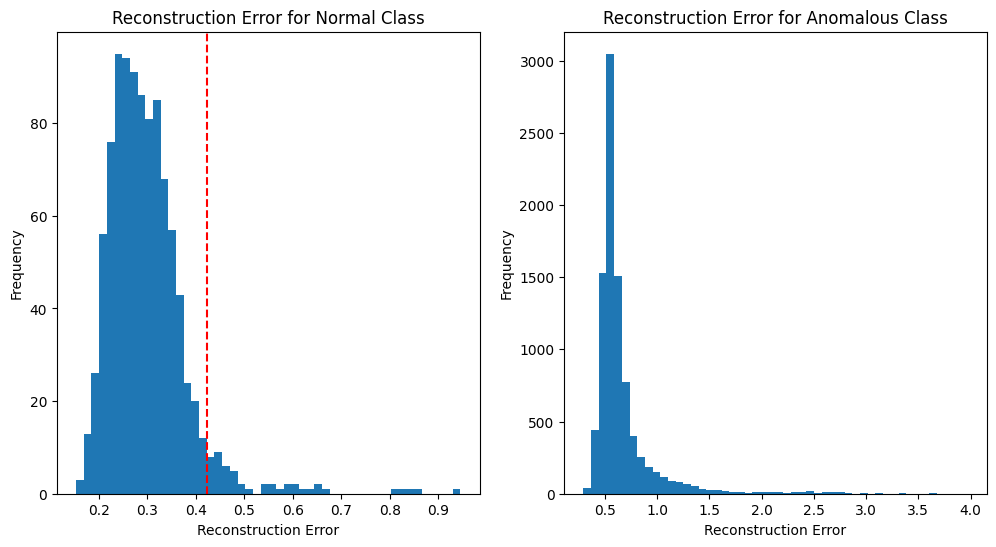

In [3]:
# Step 7: Evaluate Anomalies
# Predict using the autoencoder
X_test_normal_pred = autoencoder.predict(X_test_scaled)

# Calculate reconstruction error
reconstruction_error_normal = np.mean(np.abs(X_test_scaled - X_test_normal_pred), axis=1)

# Set a threshold for anomaly detection
threshold = np.percentile(reconstruction_error_normal, 95)  # Top 5% as anomalies

# Evaluate on normal and anomalous data
X_test_anomalous_pred = autoencoder.predict(X_test_anomalous_scaled)
reconstruction_error_anomalous = np.mean(np.abs(X_test_anomalous_scaled - X_test_anomalous_pred), axis=1)

# Identify anomalies
normal_anomalies = reconstruction_error_normal > threshold
anomalous_anomalies = reconstruction_error_anomalous > threshold

# Print results
print(f"Number of normal anomalies detected: {np.sum(normal_anomalies)}")
print(f"Number of anomalous data points: {len(X_test_anomalous)}")
print(f"Anomalous points correctly detected: {np.sum(anomalous_anomalies)}")

# Visualize reconstruction errors
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(reconstruction_error_normal, bins=50)
plt.axvline(threshold, color='r', linestyle='--')
plt.title('Reconstruction Error for Normal Class')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(reconstruction_error_anomalous, bins=50)
plt.title('Reconstruction Error for Anomalous Class')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')

plt.show()
